In [27]:
import numpy as np
import scipy.io.wavfile as wav
import librosa as lb
import matplotlib.pyplot as plt 
from mido import MidiFile, MidiTrack, Message

In [3]:
# read the WAV file
rate, data = wav.read('sample1.wav') 

# compute the Fourier Transform
frequencies = np.fft.fftfreq(len(data)) * rate
spectrum = np.fft.fft(data)

In [4]:
frequencies

array([ 0.        ,  0.16823521,  0.33647042, ..., -0.50470563,
       -0.33647042, -0.16823521])

In [19]:
converted_frequency = []
for frequency in frequencies:
    if frequency != 0:
        converted_frequency.append(lb.hz_to_midi(frequency))
    else:
        converted_frequency.append(0)

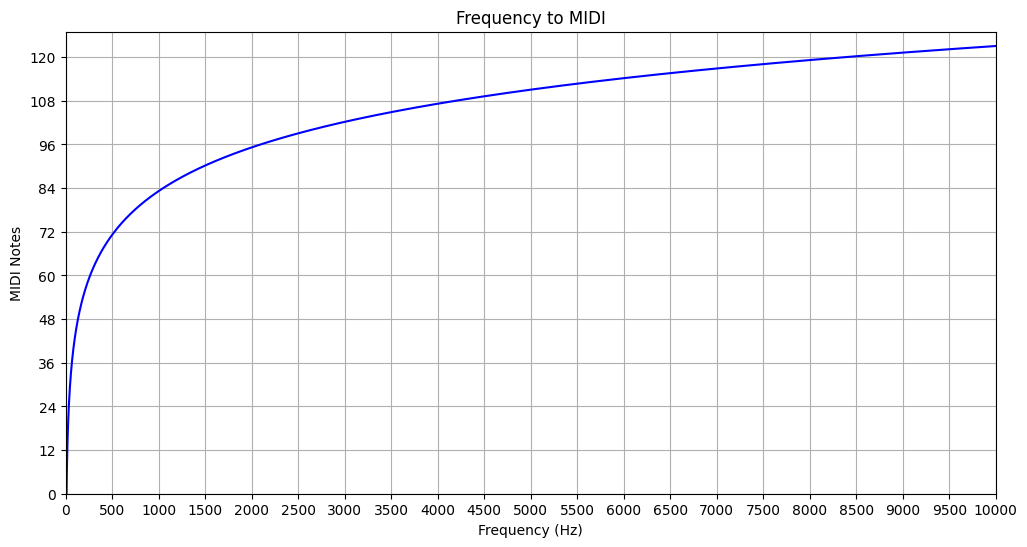

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(frequencies, converted_frequency, color='blue')
plt.title('Frequency to MIDI')
plt.xlabel('Frequency (Hz)')
plt.ylabel('MIDI Notes')
plt.grid(True)
plt.xlim(0, 10000)  # Limit x-axis to focus on lower frequencies
plt.ylim(0, 127)    # Limit y-axis to MIDI note range
plt.xticks(np.arange(0, 10001, 500))  # Set x-axis ticks every 500 Hz
plt.yticks(np.arange(0, 128, 12))     # Set y-axis ticks every octave
plt.show()

In [5]:
spectrum

array([[-3808.+0.j,     0.+0.j],
       [-2000.+0.j,     0.+0.j],
       [ 4964.+0.j,     0.+0.j],
       ...,
       [ 3778.+0.j,     0.+0.j],
       [ 3488.+0.j,     0.+0.j],
       [ 3194.+0.j,     0.+0.j]])

In [38]:
# Te
mid = MidiFile()

# Add a track to the MIDI file
track = MidiTrack()
mid.tracks.append(track)

# Iterate over the converted frequencies and add note on/off messages to the track
for midi_note in converted_frequency:
    if 0 <= midi_note <= 127:  # Skip MIDI notes with value 0
        midi_note = int(np.abs(midi_note))
        track.append(Message('note_on', note = midi_note, velocity = 64, time=0))  # Note on message
        track.append(Message('note_off', note = midi_note, velocity = 0, time=480))  # Note off message

# Save the MIDI file
mid.save('output.mid')